# Compute mean energy for a chain of 100 spins

This script computes the mean energy for a hundred-spin chain. 
We set $J_x = J_z = 1$, $n\_spins = 100$. The algorithm is valid for $\Delta \tau \rightarrow 0$,
so we set $m\_trotter = 20$ for the computation to be not too long. We choose $\beta = 1$ by default. 

In [18]:
import loopclass as lp
import numpy as np 
import matplotlib.pyplot as plt

J_x = 2.
J_z = 1.

beta = 1.
n_spins = 10
m_trotter = 5
dtau = m_trotter / beta

loop = lp.Loop(m_trotter, dtau, n_spins, J_x, J_z)

length_cycle = 10
n_warmup=100
n_cycles = 200

nt=200

## Let us show the evolution of the configuration along the QMC

<IPython.core.display.Javascript object>


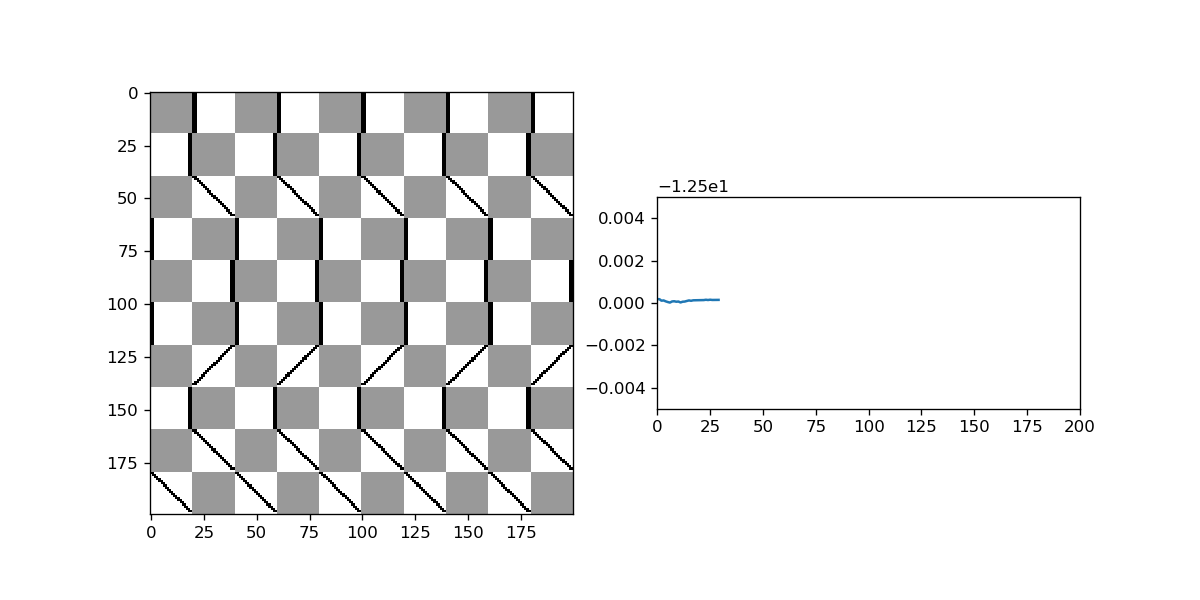

In [30]:
%matplotlib notebook
import matplotlib.animation as animation

energsum = 0
energsum +=loop.total_energy()
nm=1
meanenrg = [loop.total_energy()]
steps = [0]

# init plot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)


im = ax1.imshow(loop.createimage()/255, cmap = 'Greys_r')
ax2 = fig.add_subplot(122, aspect=10000)


line, = ax2.plot([],[])
ax2.set_xlim(0,nt)
ax2.set_ylim(-12.505,-12.495)


def do_mc_cycle(n):
    e=0
    global energsum
    global nm
    for k in range(length_cycle):
        loop.QMC_step()
        
    e += loop.total_energy()
    energsum += e
    nm +=1
    
    
    
    im.set_array(loop.createimage()/255)
    if len(meanenrg) < nt: meanenrg.append(energsum/nm)
    if len(steps) < nt:
        steps.append(n)
        
    else:
        meanenrg.insert(nt, energsum/nm)
        meanenrg.pop(0)

    line.set_data(steps, meanenrg)
    return (im, line)


ani = animation.FuncAnimation(fig, do_mc_cycle, interval=100, blit=False)

In [10]:
loop.total_energy()

-12.506711504016828